In [ ]:
!pip install Arabic-Stopwords==0.4.3

In [ ]:
!pip install bertopic==0.16.0 datasets==2.16.1

In [2]:
from datasets import load_dataset
import pandas as pd
import re
import random
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Cleaning function
def clean_text(text: str):
    if not isinstance(text, str):
        return ""
    
    # Remove URLs
    text = re.sub(r"http\S+", "رابط", text)
    
    # Replace any digit with رقم
    text = re.sub(r"\d+", "رقم", text)
    
    # Set space before and after any punctuation 
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text)

    words = word_tokenize(text)
    text = " ".join([ w for w in words if len(w) > 1 ] )

    return text.lower().strip()
    

In [ ]:
ar_dataset = load_dataset('saudinewsnet')

In [5]:
ar_dataset['train'][0]

{'source': 'aawsat',
 'url': 'http://aawsat.com/home/article/410826/بريطانيا-أربعة-محاور-لاستراتيجية-جديدة-تتصدى-للتطرف-على-مدى-خمس-سنوات',
 'date_extracted': '2015-07-21 02:51:32',
 'title': 'بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى للتطرف على مدى خمس سنوات',
 'author': 'لندن: رنيم حنوش',
 'content': 'حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليوم (الاثنين)، ملامح استراتيجية للتصدي للتطرف داخل بريطانيا؛ وهي مسألة اعتبرها كاميرون "صراع جيلنا"، متعهدا خلال خطابه في مدينة بيرمنغهام بالتصدي لهؤلاء الذين ينشرون التطرف بين الشبان المسلمين البريطانيين.\n\n ورسم كاميرون الاطار العام لاستراتيجية مكافحة التطرف التي المقرر ان تنشر كاملة في وقت لاحق هذا العام، والتي تسعى للتصدي لانتشار الأفكار المتطرفة التي يروج لها متشددو تنظيم "داعش".\n\n وحسبما تناقلت وسائل الإعلام البريطانية، فإن خطة رئيس الوزراء ستكون على مدى خمسة أعوام للقضاء على التطرف الداخلي من خلال أربعة محاور، وهي: القضاء على إيديولوجية التطرف، والوقوف في وجه عمليات التجنيد وغسل الأدمغة بالأفكار المتطرفة، وإعادة اصوات الاسلام الم

In [6]:
raw_dataset = [
    {
        "text": record['content'],
        "source": record['source'],
        "date": record['date_extracted']
    }
    for record in ar_dataset['train']
]

In [7]:
raw_dataset_df = pd.DataFrame(raw_dataset)
raw_dataset_df.shape

(31030, 3)

In [8]:
raw_dataset_df.head()

,text,source,date
0,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,aawsat,2015-07-21 02:51:32
1,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,aawsat,2015-07-21 02:51:33
2,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...,aawsat,2015-07-21 02:51:35
3,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...,aawsat,2015-07-21 02:51:37
4,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...,aawsat,2015-07-21 02:51:38


In [9]:
raw_dataset_df = raw_dataset_df.sample(frac=1, random_state=42)
raw_dataset_df.head()

,text,source,date
16261,واس – جدة: تلقى خادم الحرمين الشريفين الملك س...,sabq,2015-08-01 07:51:33
28287,لفت وزير العدل أشرف ريفي في تصريح امس «انه لو...,almadina,2015-08-10 19:24:39
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح...,alriyadh,2015-08-06 01:13:10
28752,حوادث المعلمات ومعاناتهن في الوصول يومياً إلى...,alwatan,2015-08-10 19:44:53
2772,سبق- جدة: يقدّم الدكتور عبدالرحمن بن رجا الله...,sabq,2015-07-21 02:42:37


### Data cleaning

In [10]:
raw_dataset_df['text'] = raw_dataset_df['text'].apply(clean_text)
raw_dataset_df['text_len'] = raw_dataset_df['text'].apply(len)

In [11]:
raw_dataset_df.head(2)

,text,source,date,text_len
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,920
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,1884


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='text_len', ylabel='Count'>

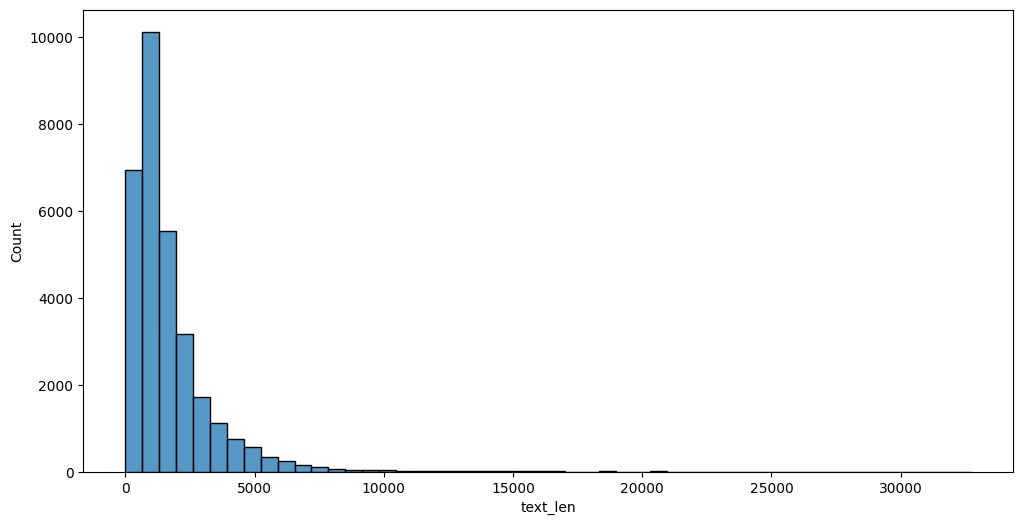

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(raw_dataset_df['text_len'], bins=50)

In [13]:
print(f"Shape before filter: {raw_dataset_df.shape}")
raw_dataset_df = raw_dataset_df[raw_dataset_df['text_len'] <= 10_000]
print(f"Shape after filter: {raw_dataset_df.shape}")

Shape before filter: (31030, 4)
Shape after filter: (30902, 4)


In [14]:
print(f"Shape before removing duplicates: {raw_dataset_df.shape}")
raw_dataset_df.drop_duplicates(['text'], inplace=True)
print(f"Shape after removing duplicates: {raw_dataset_df.shape}")

Shape before removing duplicates: (30902, 4)
Shape after removing duplicates: (29696, 4)


In [15]:
raw_dataset_df['datetime_stamp'] = raw_dataset_df['date'].apply(lambda v: datetime.strptime(v, "%Y-%m-%d %H:%M:%S"))

raw_dataset_df['datetime_stamp'] = raw_dataset_df['datetime_stamp'].apply(lambda v: v.replace(hour=0, minute=0, second=0))

### Embedding

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"

embedding_model = SentenceTransformer(model_id, device="cuda")

In [19]:
news_embeddings = embedding_model.encode(raw_dataset_df['text'].values, show_progress_bar=True)
print(f"Embeddings dimension: {news_embeddings.shape}")

Batches:   0%|          | 0/928 [00:00<?, ?it/s]

Embeddings dimension: (29696, 512)


### Reduce dimension

In [20]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15,
                 n_components=15,
                 min_dist=0.0,
                 metric='cosine',
                 random_state=42)



### Clustring

In [21]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=50,
                       metric='euclidean',
                       cluster_selection_method='eom',
                       prediction_data=True)

### Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp

stop_words = stp.stopwords_list()

vectorizer_model = CountVectorizer(min_df=3,
                                   stop_words=stop_words,
                                   analyzer='word',
                                   max_df=0.5,
                                   ngram_range=(1, 3)
                                   )

### Topic Representer

In [23]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

In [33]:
from bertopic import BERTopic

topic_model = BERTopic(
    # Pipeline model
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    
    # Hyperparameters
    top_n_words=10,
    verbose=True
)

topics, probs = topic_model.fit_transform(
    raw_dataset_df['text'].values,
    news_embeddings
)

2024-10-02 06:16:22,264 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-02 06:17:10,337 - BERTopic - Dimensionality - Completed ✓
2024-10-02 06:17:10,340 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-02 06:17:14,766 - BERTopic - Cluster - Completed ✓
2024-10-02 06:17:14,777 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-02 06:18:32,459 - BERTopic - Representation - Completed ✓


In [25]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,8649,-1_في_من_على_أن,"[في, من, على, أن, إلى, رقم, التي, بن, عن, أو]","[عبدالله, السعودية, الملك, عبدالعزيز, العربية,...",[كما تحتاج الورود إلى العناية لكي تتفتح وتعيش ...
1,0,4099,0_الفريق_القدم_في_النادي,"[الفريق, القدم, في, النادي, الاتحاد, الموسم, ا...","[فريقه, فريق, للفريق, البطولة, المباريات, المو...",[ينهي فريق الاتحاد اليوم الجمعة مرحلة الإعداد ...
2,1,1719,1_رقم_المائة_بنسبة_ريال,"[رقم, المائة, بنسبة, ريال, النفط, في, أسعار, د...","[السعودية, السوق, سوق, الاقتصاد, النفط, المؤشر...",[واصلت الأسهم السعودية ارتفاعها عقب استئناف تد...
3,2,1302,2_عدن_المقاومة_اليمن_الحوثيين,"[عدن, المقاومة, اليمن, الحوثيين, الحوثي, اليمن...","[اليمن, اليمنيين, اليمنية, اليمني, السعودية, ا...",[واصل مقاتلو المقاومة الشعبية في اليمن تقدمهم ...
4,3,923,3_الله_الطوارئ_الأمن_من,"[الله, الطوارئ, الأمن, من, الإرهابي, في, الوطن...","[الإرهابية, الإرهابي, الإرهاب, المسجد, المسلمي...",[أدان مسؤولو مجلس الشورى وعدد من الأعضاء العمل...
...,...,...,...,...,...,...
68,67,59,67_البحرين_مملكة_الإيرانية_التصريحات,"[البحرين, مملكة, الإيرانية, التصريحات, البحرين...","[الإيرانية, الإيراني, إيران, إيرانيين, البحرين...",[أكد معالي الفريق الركن الشيخ راشد بن عبدالله ...
69,68,58,68_بالمر_سيسيل_الأسد_زيمبابوي,"[بالمر, سيسيل, الأسد, زيمبابوي, الحيوان, كاليف...","[الذئب, الحيوان, كاليفورنيا, البرية, حيوان, بق...",[أثار مقتل أشهر أسد في زيمبابوي جدلا واسعا تجا...
70,69,56,69_عكاظ_سوق_الفيصل_لسوق,"[عكاظ, سوق, الفيصل, لسوق, الإشرافية, الشعرية, ...","[الملك, الأمير, خالد, أمير, المملكة, عبدالعزيز...",[تحت رعاية خادم الحرمين الشريفين الملك سلمان ب...
71,70,54,70_كورونا_حالة_الصحة_حالات,"[كورونا, حالة, الصحة, حالات, بفيروس, للشفاء, ا...","[الصحة, الصحية, بالمرض, الفيروس, الرياض, المرض...",[نفذت رئيسة كوريا الجنوبية باك جون أمس وعدها ب...


In [34]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,8649,-1_المعرض_أمير منطقة_للسياحة_الهيئة العامة,"[المعرض, أمير منطقة, للسياحة, الهيئة العامة, ا...","[الملك سلمان عبدالعزيز, الملك عبدالله, الأمير ...",[تواصل الهيئة العامة للسياحة والتراث الوطني أع...
1,0,4099,0_القدم_النادي_الموسم_اللاعب,"[القدم, النادي, الموسم, اللاعب, اللاعبين, لكرة...","[السعودي لكرة القدم, الأول لكرة القدم, كرة الق...",[يبدو أن المنافسة ستكون حامية في الموسم الجديد...
2,1,1719,1_النفط_بنسبة رقم رقم_سعر_رقم رقم مليار,"[النفط, بنسبة رقم رقم, سعر, رقم رقم مليار, رقم...","[أسعار النفط, دبي, رقم رقم نقطة, رقم رقم بالمئ...",[سجلت الأسهم السعودية أمس أسوأ جلساتها خلال أر...
3,2,1302,2_عدن_المقاومة_الحوثيين_الحوثي,"[عدن, المقاومة, الحوثيين, الحوثي, اليمنية, الت...","[عبدالله صالح, التحالف العربي, الرئيس اليمني, ...",[فيما دعا الرئيس اليمني عبدربه منصور هادي ميلي...
4,3,923,3_الإرهابي_قوات الطوارئ_مسجد_رجال الأمن,"[الإرهابي, قوات الطوارئ, مسجد, رجال الأمن, الط...","[تفجير مسجد, استهدف مسجد قوات, مسجد قوات الطوا...",[أدان مسؤولو مجلس الشورى وعدد من الأعضاء العمل...
...,...,...,...,...,...,...
68,67,59,67_البحرين_مملكة البحرين_مملكة_الإيرانية,"[البحرين, مملكة البحرين, مملكة, الإيرانية, الت...","[التدخلات الإيرانية الشأن, التدخلات الإيرانية,...",[عين اليوم المنامة أكد الفريق الركن الشيخ راشد...
69,68,58,68_بالمر_سيسيل_زيمبابوي_الحيوان,"[بالمر, سيسيل, زيمبابوي, الحيوان, الأسد, كاليف...","[الحياة البرية, القرش, طبيب أسنان, الذئب, طبيب...",[أثار مقتل أشهر أسد في زيمبابوي جدلا واسعا تجا...
70,69,56,69_سوق عكاظ_خالد الفيصل_الأمير خالد الفيصل_لسو...,"[سوق عكاظ, خالد الفيصل, الأمير خالد الفيصل, لس...","[الملكي الأمير خالد, الأمير خالد الفيصل, سمو ا...",[تحت رعاية خادم الحرمين الشريفين الملك سلمان ب...
71,70,54,70_كورونا_رقم حالة_بفيروس_بفيروس كورونا,"[كورونا, رقم حالة, بفيروس, بفيروس كورونا, وزار...","[أعلنت وزارة الصحة, وزارة الصحة اليوم, وزارة ا...",[أعلنت وزارة الصحة اليوم الجمعة تسجيل حالة إصا...


### LaBSE embeddings


In [ ]:
from sentence_transformers import SentenceTransformer

model_id = "sentence-transformers/LaBSE"

embedding_model = SentenceTransformer(model_id, device="cuda")

In [36]:
news_embeddings = embedding_model.encode(raw_dataset_df['text'].values, show_progress_bar=True)
print(f"Embeddings dimension: {news_embeddings.shape}")

Batches:   0%|          | 0/928 [00:00<?, ?it/s]

Embeddings dimension: (29696, 768)


In [37]:
from bertopic import BERTopic

topic_model = BERTopic(
    # Pipeline model
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    
    # Hyperparameters
    top_n_words=10,
    verbose=True
)

topics, probs = topic_model.fit_transform(
    raw_dataset_df['text'].values,
    news_embeddings
)

2024-10-02 07:31:45,814 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-02 07:32:36,779 - BERTopic - Dimensionality - Completed ✓
2024-10-02 07:32:36,782 - BERTopic - Cluster - Start clustering the reduced embeddings
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this 

In [38]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,9484,-1_رقم مليار_بنسبة رقم رقم_رقم رقم المائة_رقم ...,"[رقم مليار, بنسبة رقم رقم, رقم رقم المائة, رقم...","[الملك سلمان عبدالعزيز, الشريفين الملك سلمان, ...",[رأس نائب خادم الحرمين الشريفين صاحب السمو الم...
1,0,4098,0_القدم_النادي_الموسم_اللاعب,"[القدم, النادي, الموسم, اللاعب, اللاعبين, لكرة...","[تشيلسي, السعودي لكرة القدم, لاعبين, اللاعبين,...",[أوضح مصدر مسؤول بإدارة الهلال أن النادي لا عل...
2,1,1116,1_عدن_المقاومة_الحوثيين_اليمن,"[عدن, المقاومة, الحوثيين, اليمن, الحوثي, الشعب...","[الحوثيين وقوات, عدن, وقوات, مطار عدن, ميليشيا...",[وصلت أمس الأحد تجهيزات عسكرية مقدمة من دول ال...
3,2,929,2_إيران_الاتفاق_النووي_الإيراني,"[إيران, الاتفاق, النووي, الإيراني, الاتفاق الن...","[الاتفاق النووي إيران, الاتفاق النووي, وإيران,...",[أعلن وزير الخارجية الأميركية جون كيري أن بلاد...
4,3,528,3_وإنشاء_المرورية_البلدية_الأمانة,"[وإنشاء, المرورية, البلدية, الأمانة, المشروعات...","[مشروعات, المشروعات, ومشروع, وإنشاء, وطريق, وت...",[يطلع مستشار خادم الحرمين الشريفين أمير منطقة ...
...,...,...,...,...,...,...
91,90,55,90_الحج_حجاج الداخل_الحجاج_حجاج,"[الحج, حجاج الداخل, الحجاج, حجاج, وزارة الحج, ...","[حجاج, حجار, الحجاج, موسم حج العام, موسم حج, ل...",[كشفت وزارة الحج عن فتح بوابة المسار الإلكترون...
92,91,52,91_الحملة_السوريين_الوطنية السعودية_الأشقاء,"[الحملة, السوريين, الوطنية السعودية, الأشقاء, ...","[للأشقاء اللاجئين السوريين, اللاجئين السوريين,...",[أنهت الحملة الوطنية السعودية المرحلة الثالثة ...
93,92,52,92_الفائدة_الأسهم_الصين_أسعار الفائدة,"[الفائدة, الأسهم, الصين, أسعار الفائدة, النمو,...","[بنك اليابان, بنك إنجلترا, البنوك, بنك, البنك ...",[مما لا شك فيه أن التطورات في سوق المال هي أحد...
94,93,52,93_السياحية_القرية_الشاطئ_الخلابة,"[السياحية, القرية, الشاطئ, الخلابة, جبال, السب...","[سياحي, جبال, شاطئ, وادي, الشلالات, سياحية, شل...",[تختص منطقة الهدا في محافظة الطائف التي تشهد ه...


In [39]:
raw_dataset_df['topic'] = topics
raw_dataset_df['probs'] = probs

In [40]:
raw_dataset_df.head(2)

,text,source,date,text_len,datetime_stamp,topic,probs
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,920,2015-08-01,-1,0.000000
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,1884,2015-08-10,29,0.342766


In [42]:
topic_model.visualize_topics()

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [43]:
topic_model.visualize_heatmap()

In [46]:
topics_per_class = topic_model.topics_per_class(
    raw_dataset_df['text'].values,
    classes=raw_dataset_df['source'].values,
)

14it [00:30,  2.17s/it]


In [48]:
topic_model.visualize_topics_per_class(topics_per_class, 
                                      top_n_topics=20)

In [50]:
topics_over_time = topic_model.topics_over_time(
    raw_dataset_df['text'].values,
    raw_dataset_df['datetime_stamp'].values
)

18it [02:12,  7.35s/it]


In [51]:
topic_model.visualize_topics_over_time(
    topics_over_time,
    topics=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
)

In [52]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)

100%|██████████| 94/94 [00:01<00:00, 63.85it/s]


In [53]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

### Topics Merging

In [54]:
topics_to_merge = [
    [15, 60, 4],
    [30, 23, 7]
]

topic_model.merge_topics(
    raw_dataset_df['text'].values,
    topics_to_merge
)

In [55]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)

topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

100%|██████████| 90/90 [00:01<00:00, 63.45it/s]


### Topics Filtering

In [56]:
raw_dataset_df.head()

,text,source,date,text_len,datetime_stamp,topic,probs
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,920,2015-08-01,-1,0.000000
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,1884,2015-08-10,29,0.342766
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,1197,2015-08-06,0,1.000000
28752,حوادث المعلمات ومعاناتهن في الوصول يوميا إلى م...,alwatan,2015-08-10 19:44:53,2702,2015-08-10,16,1.000000
2772,سبق جدة يقد الدكتور عبدالرحمن بن رجا الله السل...,sabq,2015-07-21 02:42:37,716,2015-07-21,53,1.000000


In [57]:
filtered_raw_dataset_df = raw_dataset_df[ ~raw_dataset_df['topic'].isin([-1]) ]

### Inference

In [58]:
story = """
طرحت مؤسسة البترول الكويتية عطاءً؛ لبيع زيت وقود عالي الكبريت للتحميل في الفترة من فبراير/ شباط إلى إبريل/ نيسان.
وأوضحت مصادر تجارية، اليوم الخميس، أن المؤسسة تعرض شحنات من زيت الوقود عالي الكبريت تبلغ الواحدة 60 ألف طن لتحميلها من الكويت شهرياً بالفترة المذكورة.
"""

_topic, _prob =  topic_model.transform([story])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-10-02 08:13:55,334 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-10-02 08:14:16,850 - BERTopic - Dimensionality - Completed ✓
2024-10-02 08:14:16,851 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-10-02 08:14:16,853 - BERTopic - Cluster - Completed ✓


In [59]:
_topic, _prob

([4], array([0.70043691]))

In [60]:
topic_model.get_topic(_topic[0])

[('النفط', 0.03067332722781311),
 ('برميل', 0.017526872616763257),
 ('الخام', 0.015348851681566111),
 ('للبرميل', 0.01293035945473688),
 ('الأسعار', 0.011947355250150586),
 ('الإسكان', 0.011530274844514792),
 ('أسعار النفط', 0.010967224915221558),
 ('رقم دولار', 0.01095729092600895),
 ('مليون برميل', 0.010205294717985492),
 ('رقم رقم دولار', 0.010187892665025294)]

In [61]:
filtered_raw_dataset_df[ filtered_raw_dataset_df['topic'] == _topic[0] ].head()

,text,source,date,text_len,datetime_stamp,topic,probs
14475,صرح الناطق الإعلامي بشرطة منطقة مكة المكرمة ال...,alweeam,2015-07-31 18:23:52,463,2015-07-31,4,0.721508
26401,حنان الحامدي عين اليوم تمكنت الهيئة الوطنية لم...,3alyoum,2015-08-09 17:27:41,514,2015-08-09,4,0.693403
12957,سلوى المدني عين اليوم صرح الناطق الإعلامي بشرط...,3alyoum,2015-07-31 04:21:15,816,2015-07-31,4,0.839609
23511,عبدالله البرقاوي سبق الرياض أصيب إعلامي سوري ي...,sabq,2015-08-06 18:33:48,692,2015-08-06,4,0.613605
15306,قال وكيل مغنية الكانتري الأمريكية لين أندرسون ...,aleqtisadiya,2015-08-01 14:36:55,647,2015-08-01,4,0.629944


### Save and Reload

In [62]:
model_id = "sentence-transformers/LaBSE"
topic_model.save("/kaggle/working/safe_bertopic", serialization="safetensors",
                 save_ctfidf=True, save_embedding_model=model_id)

loaded_model = BERTopic.load("/kaggle/working/safe_bertopic")

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [64]:
!zip -r file.zip /kaggle/working

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/safe_bertopic/ (stored 0%)
  adding: kaggle/working/safe_bertopic/ctfidf.safetensors (deflated 65%)
  adding: kaggle/working/safe_bertopic/config.json (deflated 42%)
  adding: kaggle/working/safe_bertopic/topic_embeddings.safetensors (deflated 7%)
  adding: kaggle/working/safe_bertopic/topics.json (deflated 85%)
  adding: kaggle/working/safe_bertopic/ctfidf_config.json (deflated 83%)
